In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

In [52]:
nvidia_df = pdr.get_data_yahoo('NVDA', '2010-01-01')
nvidia_df['Date'] = nvidia_df.index
amd_df = pdr.get_data_yahoo('AMD', '2010-01-01')
intel_df = pdr.get_data_yahoo('INTC', '2010-01-01')

In [53]:
total_df = pd.concat([nvidia_df, amd_df, intel_df])
total_df["Date"] = total_df.index
total_df.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2010-01-04  18.620001  18.110001  18.510000  18.490000  20005100.0  17.004965   
2010-01-05  18.959999  18.420000  18.420000  18.760000  18216200.0  17.253283   
2010-01-06  18.920000  18.570000  18.750000  18.879999  16229200.0  17.363640   
2010-01-07  18.860001  18.370001  18.780001  18.510000  13694800.0  17.023359   
2010-01-08  18.680000  18.250000  18.360001  18.549999  11954200.0  17.060148   

                 Date  
Date                   
2010-01-04 2010-01-04  
2010-01-05 2010-01-05  
2010-01-06 2010-01-06  
2010-01-07 2010-01-07  
2010-01-08 2010-01-08

In [59]:
nvidia_df['30d mavg'] = nvidia_df['Close'].rolling(window=30).mean()
nvidia_df['30d std'] = nvidia_df['Close'].rolling(window=30).std()

nvidia_df['Upper Band'] = nvidia_df['30d mavg'] + (nvidia_df['30d std'] * 2)
nvidia_df['Lower Band'] = nvidia_df['30d mavg'] - (nvidia_df['30d std'] * 2)
nvidia_df.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2020-08-27  514.000000  502.660004  511.260010  505.130005   7940100.0   
2020-08-28  525.919983  505.700012  507.000000  525.909973  13429000.0   
2020-08-31  543.000000  521.510010  527.309998  534.979980  12521000.0   
2020-09-01  559.750000  537.460022  539.200012  552.840027  12782900.0   
2020-09-02  589.069885  556.010010  588.150024  574.619995  20673385.0   

             Adj Close       Date    30d mavg    30d std  Upper Band  \
Date                                                                   
2020-08-27  504.978912 2020-08-27  452.119000  36.006647  524.132293   
2020-08-28  525.752686 2020-08-28  456.047333  37.434466  530.916264   
2020-08-31  534.819946 2020-08-31  459.865666  39.463303  538.792271   
2020-09-01  552.840027 2020-09-01  464.522333  41.925066  548.372465   
2020-09-02  574.619995 2020-09-02  469.758000  45.511026  560.780052   

            Lower Band  
Date                    
2020-08-27  380.105707  
2020-08-28  381.178401  
2020-08-31  380.939061  
2020-09-01  380.672200  
2020-09-02  378.735947

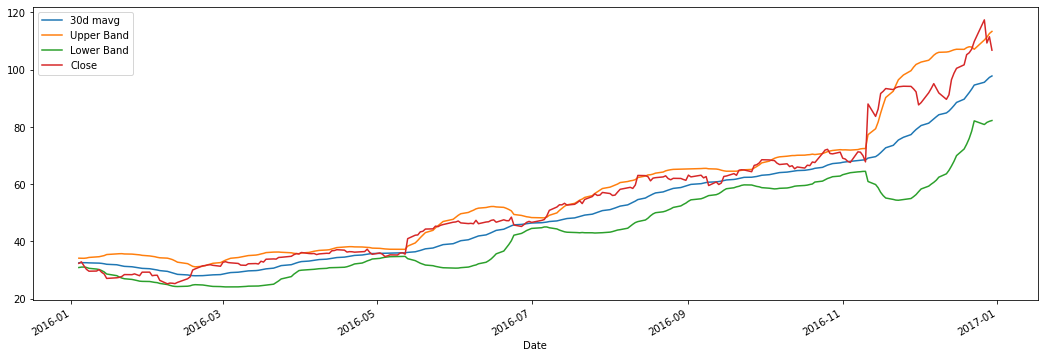

In [55]:
cols = ['30d mavg','Upper Band','Lower Band', 'Close']
        
df_Boll = nvidia_df[cols]['2016']
df_Boll.plot(figsize=(18,6))

In [69]:
date = '2016-01-03'
date_sold = '2017-01-03'

stock_number = 10

# profit made in 2016 for 10 of each stock
portfolio_value_2016 = total_df[ total_df['Date'] == date]['Close'].sum()
portfolio_value_2017 = total_df[ total_df['Date'] == date_sold]['Close'].sum()
(portfolio_value_2017-portfolio_value_2016) * 10

1500.4000091552734

In [88]:
close_over_upper = nvidia_df[ nvidia_df['Close'] > nvidia_df['Upper Band'] ]
close_over_upper_2016 = close_over_upper[cols]['2020']
close_over_upper_2016['Above'] = True
close_over_upper_2016

30d mavg  Upper Band  Lower Band       Close  Above
Date                                                             
2020-02-10  245.086333  258.848526  231.324140  262.970001   True
2020-02-11  246.120334  261.848894  230.391774  267.890015   True
2020-02-12  247.461001  265.066598  229.855403  272.540009   True
2020-02-13  248.643667  267.585005  229.702329  270.779999   True
2020-02-14  250.306334  274.188008  226.424659  289.790009   True
2020-02-18  252.323001  280.972055  223.673946  296.570007   True
2020-02-19  254.911001  290.933160  218.888843  314.700012   True
2020-02-20  257.203335  297.749186  216.657484  308.700012   True
2020-05-11  281.723667  319.830001  243.617334  322.619995   True
2020-05-15  290.271001  331.407482  249.134521  339.630005   True
2020-05-18  293.807668  336.658958  250.956379  350.010010   True
2020-05-19  296.601668  343.351106  249.852231  352.220001   True
2020-05-20  299.927335  349.713285  250.141385  358.799988   True
2020-05-22  305.999334  359.503653  252.495015  361.049988   True
2020-07-06  364.213003  391.233123  337.192882  393.570007   True
2020-07-07  365.340336  394.547917  336.132755  394.869995   True
2020-07-08  367.338004  399.849908  334.826099  408.640015   True
2020-07-09  369.983003  406.318053  333.647952  420.359985   True
2020-07-10  372.639336  411.322767  333.955906  419.170013   True
2020-08-04  404.333333  446.206963  362.459704  449.109985   True
2020-08-05  406.782333  450.820952  362.743715  451.470001   True
2020-08-17  427.814999  473.992845  381.637154  493.480011   True
2020-08-18  431.000333  480.814783  381.185883  490.429993   True
2020-08-21  438.678666  499.993771  377.363562  507.339996   True
2020-08-24  442.236000  507.050551  377.421448  508.809998   True
2020-09-01  464.522333  548.372465  380.672200  552.840027   True
2020-09-02  469.758000  560.780052  378.735947  574.619995   True

In [87]:
close_under_lower = nvidia_df[ nvidia_df['Close'] < nvidia_df['Lower Band'] ]
close_under_lower_2016 = close_under_lower[cols]['2020']
close_under_lower_2016['Above'] = False
close_under_lower_2016

30d mavg  Upper Band  Lower Band       Close  Above
Date                                                             
2020-03-12  265.514002  308.664339  222.363666  216.309998  False
2020-03-16  264.014002  313.260846  214.767159  196.399994  False
2020-03-18  261.768336  317.496109  206.040563  202.820007  False

In [95]:
stock_amount = 0
total_profit = 0

boll = pd.concat([close_under_lower_2016, close_over_upper_2016])
boll.sort_values(axis=0, by="Date")


30d mavg  Upper Band  Lower Band       Close  Above
Date                                                             
2020-02-10  245.086333  258.848526  231.324140  262.970001   True
2020-02-11  246.120334  261.848894  230.391774  267.890015   True
2020-02-12  247.461001  265.066598  229.855403  272.540009   True
2020-02-13  248.643667  267.585005  229.702329  270.779999   True
2020-02-14  250.306334  274.188008  226.424659  289.790009   True
2020-02-18  252.323001  280.972055  223.673946  296.570007   True
2020-02-19  254.911001  290.933160  218.888843  314.700012   True
2020-02-20  257.203335  297.749186  216.657484  308.700012   True
2020-03-12  265.514002  308.664339  222.363666  216.309998  False
2020-03-16  264.014002  313.260846  214.767159  196.399994  False
2020-03-18  261.768336  317.496109  206.040563  202.820007  False
2020-05-11  281.723667  319.830001  243.617334  322.619995   True
2020-05-15  290.271001  331.407482  249.134521  339.630005   True
2020-05-18  293.807668  336.658958  250.956379  350.010010   True
2020-05-19  296.601668  343.351106  249.852231  352.220001   True
2020-05-20  299.927335  349.713285  250.141385  358.799988   True
2020-05-22  305.999334  359.503653  252.495015  361.049988   True
2020-07-06  364.213003  391.233123  337.192882  393.570007   True
2020-07-07  365.340336  394.547917  336.132755  394.869995   True
2020-07-08  367.338004  399.849908  334.826099  408.640015   True
2020-07-09  369.983003  406.318053  333.647952  420.359985   True
2020-07-10  372.639336  411.322767  333.955906  419.170013   True
2020-08-04  404.333333  446.206963  362.459704  449.109985   True
2020-08-05  406.782333  450.820952  362.743715  451.470001   True
2020-08-17  427.814999  473.992845  381.637154  493.480011   True
2020-08-18  431.000333  480.814783  381.185883  490.429993   True
2020-08-21  438.678666  499.993771  377.363562  507.339996   True
2020-08-24  442.236000  507.050551  377.421448  508.809998   True
2020-09-01  464.522333  548.372465  380.672200  552.840027   True
2020-09-02  469.758000  560.780052  378.735947  574.619995   True

In [96]:
for index,row in boll.iterrows():
    if not row['Above']:
        total_profit = total_profit - (row['Close'] * 10)
        stock_amount = stock_amount + 10
    else:
        if stock_amount >= 10:
            total_profit = total_profit + (row['Close'] * 10)
            stock_amount = stock_amount + 10
        
        

In [97]:
print(total_profit)

98174.50073242188
